In [ ]:
#用户数据集
from pyspark import SparkContext
sc.stop()
sc = SparkContext("local")
user_data = sc.textFile("file:///E:/Code/python_spark/six_cases"
                        "/movie_lens/data/u.user")
# user id | age | gender | occupation | zip code
print(user_data.take(5)) 

In [67]:
user_fields = user_data.map(lambda x:x.split("|"))
user_nums = user_fields.map(lambda x:x[0]).count()  # 用户数
occupation_nums = user_fields.map(lambda x:x[3]).distinct().count() # 职业数
print("用户数为：%d,职业数为：%d" %(user_nums,occupation_nums))

用户数为：943,职业数为：21


D:\Soft\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


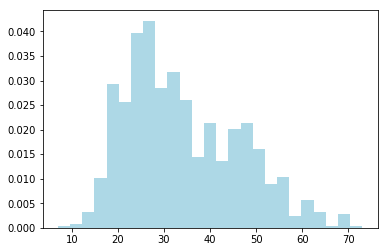

In [146]:
# 查看年龄分布情况
ages = user_fields.map(lambda x: int(x[1])).collect()  
  
import matplotlib.pyplot as plt  
plt.hist(ages, bins=25, color='lightblue', normed=True)   
plt.show() 

<BarContainer object of 21 artists>

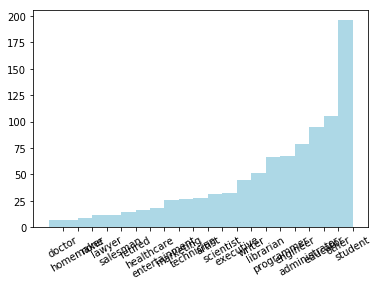

In [121]:
import numpy as np

# 统计各职业人数的个数
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1))\
    .reduceByKey(lambda x, y: x + y).collect()
 
# 生成x/y坐标轴
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
x_axis = x_axis1[np.argsort(y_axis1)]  # 和y_axis1相同的顺序
y_axis = y_axis1[np.argsort(y_axis1)]
 
# 生成x轴标签
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
 
# 绘制职业人数条状图
plt.xticks(rotation=30)
plt.bar(pos, y_axis, width, color='lightblue')

In [122]:
movie_data = sc.textFile("file:///E:/Code/python_spark/six_cases/"
                         "movie_lens/data/u.item")
print(movie_data.take(5))
# movie id | movie title | release date | video release date |.....

['1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0', '2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0', '3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0', '4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0', '5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0']


In [124]:
num_movies = movie_data.count()
print(num_movies)

1682


In [133]:
# 过滤掉没有发行时间信息的记录
def get_time(x):
    try:
        return int(x[2][-4:])
    except:
        return 2018
movie_fields = movie_data.map(lambda x:x.split("|"))
time_data = movie_fields.map(lambda x:get_time(x))
time = time_data.filter(lambda x: x != 2018)
print(time.take(10))

[1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1996]


D:\Soft\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


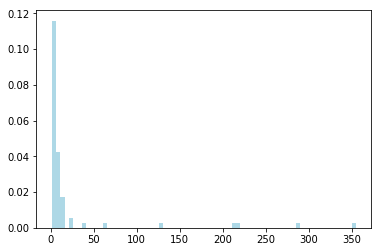

In [147]:
# 统计影片的年龄分布
from matplotlib.ticker import MultipleLocator

movie_ages = time.map(lambda yr: 1998-yr).countByValue()
# 获得影片数
values = movie_ages.values()
# 获得年龄
bins = movie_ages.keys()
# 绘制电影年龄分布图
plt.hist(values, bins=values.__len__(), color='lightblue', normed=True)
plt.show()

In [149]:
rating_data_raw = sc.textFile("file:///E:/Code/python_spark/"
                              "six_cases/movie_lens/data/u.data")
print(rating_data_raw.take(3)) # user id | item id | rating | timestamp. 

['196\t242\t3\t881250949', '186\t302\t3\t891717742', '22\t377\t1\t878887116']


In [150]:
num_ratings = rating_data_raw.count()
print(num_ratings)

100000


In [151]:
rating_data = rating_data_raw.map(lambda line: line.split("\t"))
ratings = rating_data.map(lambda fields: int(fields[2]))

max_rating = ratings.reduce(lambda x, y: max(x, y))
min_rating = ratings.reduce(lambda x, y: min(x, y))

mean_rating = ratings.reduce(lambda x, y: x + y) / float(num_ratings)
median_rating = np.median(ratings.collect())

ratings_per_user = num_ratings / user_nums
ratings_per_movie = num_ratings / num_movies
# 输出结果
print("最低评分: %d" % min_rating)
print("最高评分: %d" % max_rating)
print("平均评分: %2.2f" % mean_rating)
print("中位评分: %d" % median_rating)
print("平均每个用户打分(次数): %2.2f" % ratings_per_user)
print("平均每部电影评分(次数): %2.2f" % ratings_per_movie)

最低评分: 1
最高评分: 5
平均评分: 3.53
中位评分: 4
平均每个用户打分(次数): 106.04
平均每部电影评分(次数): 59.45


In [154]:
print(ratings.stats())

(count: 100000, mean: 3.529859999999947, stdev: 1.1256679707622548, max: 5.0, min: 1.0)


In [176]:
count_by_rating = ratings.countByValue()
# 生成x/y坐标轴
x_axis = np.array(count_by_rating.keys())
y_axis = np.array([float(c) for c in count_by_rating.values()])
# 对个数做标准化
y_axis_normed = y_axis / y_axis.sum()

# 生成x轴标签
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

# 绘制评分分布柱状图
plt.bar(pos, y_axis_normed, width, color='lightblue')
plt.xticks(rotation=30)
plt.show()

IndexError: tuple index out of range

In [162]:
# 首先将数据以用户id为Key分发到各个节点
user_ratings_grouped = rating_data.map(lambda fields: (int(fields[0]), int(fields[2])))\
    .groupByKey() 
#print(user_ratings_grouped.mapValues(len).collect())
# 然后统计每个节点元素的个数，也即每个用户的评论次数
user_ratings_byuser = user_ratings_grouped.mapValues(len)
# # 输出前5条记录
print(user_ratings_byuser.take(5))

[(196, 39), (186, 92), (22, 128), (244, 238), (166, 20)]
